# Preamble

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from matplotlib.patches import Ellipse,Rectangle
import palettable.colorbrewer as pc

from astropy.stats import sigma_clipped_stats
from astropy.io import fits
from photutils import datasets
from photutils import DAOStarFinder
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

from cycler import cycler
plt.rcParams["axes.prop_cycle"]=cycler('color',pc.qualitative.Set3_12.mpl_colors)

%matplotlib inline

def plot_moles(FIG,AX,SRCS):
    positions = (SRCS['xcentroid'], SRCS['ycentroid'])
    apertures = CircularAperture(positions, r=50)
    norm = ImageNormalize(stretch=SqrtStretch())
    im=AX.imshow(data, cmap='Greys', origin='lower', norm=norm)
#     ax.set_aspect(0.5)
    apertures.plot(color='C0', lw=3., alpha=0.5)

#     cax = FIG.add_axes([1., 0.14, 0.1, 0.79]) ## [x0,y0,width,height]
#     fig.colorbar(im,cax=cax)
    # print(apertures)

    rect = Rectangle((500,1000),1500,2000,linewidth=5,ls="--",edgecolor='r',facecolor='none') ## xy, width, height
    AX.add_patch(rect)

    AX.set_xticks(range(0,2500,500))
    AX.set_xlabel(r"$x\,/\,{\rm Pixels}$",fontsize=50)
    AX.set_ylabel(r"$y\,/\,{\rm Pixels}$",fontsize=50)

def find_sources(DATA):
    mask_y=[1000,3000]
    mask_x=[500,2000]
    mask = np.ones_like(DATA, dtype=bool)
    # mask[mask_y[0]:mask_y[1],mask_x[0]:mask_x[1]] = False
    mean,median,std=sigma_clipped_stats(DATA,sigma=2.0)    

    daofind = DAOStarFinder(fwhm=10.0, threshold=5.*std)#,sigma_radius=2)#,roundlo=0.1)    
    SOURCES = daofind(DATA-median,mask=mask)    
    for col in SOURCES.colnames:    
        SOURCES[col].info.format = '%.5g'  # for consistent table output
    print(SOURCES)
    return SOURCES

def get_smooth_dist(y,lim="L"):
    if lim=="L":
        MIN,MAX=38.,46.
    else:
        MIN,MAX=3.,251.
    density=ss.gaussian_kde(y)
#     ys = np.linspace(np.min(y)/1.1,np.max(y)*1.1,200)
    ys = np.linspace(MIN,MAX,200)
    density.covariance_factor = lambda : .25
    density._compute_covariance()
    
    dens=density(ys)
    normed=dens/np.max(dens)
    return normed,ys


def plot_key(fig,ax_key,data):
    ax_key.scatter(data,data,label=r"${\bf DATA}$" %locals(),marker=".",facecolor="0.6",edgecolor="none",linewidth=4.,s=500,zorder=-10**8,alpha=1.)
    ax_key.set_xlim([0.,1.])
    ax_key.set_ylim(ax_key.get_xlim())
    leg=ax_key.legend(loc="lower center",framealpha=0.,fontsize=50.,handletextpad=0.1,labelspacing=.5,bbox_to_anchor=(0.35,-0.05))

    cols=["0.6","C0","C2","C3"]
    for i,txt in enumerate(leg.get_texts()):
        txt.set_color(cols[i])


    

## Extract cut out of each mole

/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python

No intersections found -- mole might be quite faint...


/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python

No intersections found -- mole might be quite faint...


/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


No intersections found -- mole might be quite faint...


/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/pboorman/anaconda/envs/py36/lib/python

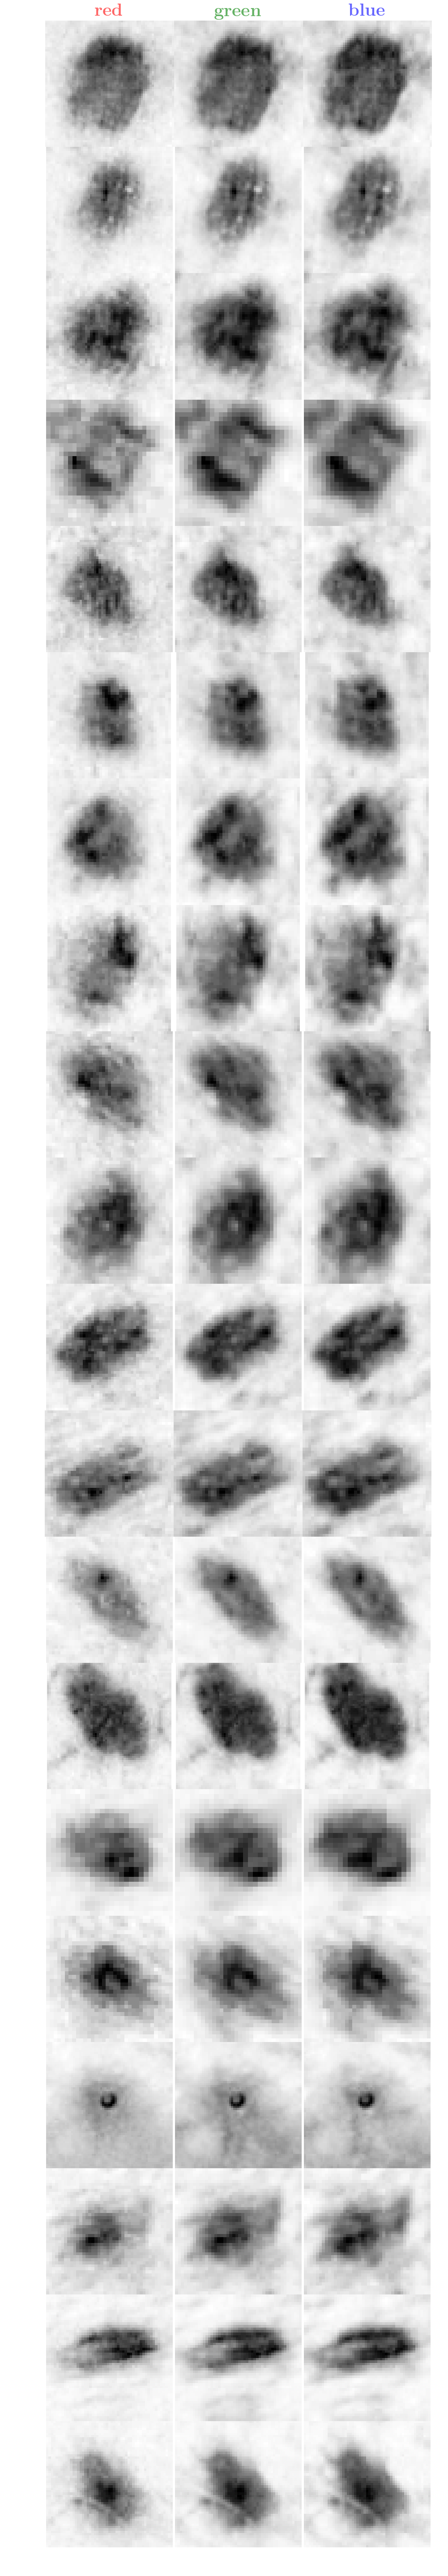

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from regions import read_ds9,write_ds9,PixCoord,BoundingBox
from astropy.io import fits
from astropy.stats import SigmaClip

import palettable.colorbrewer as pc
from cycler import cycler
plt.rcParams["axes.prop_cycle"]=cycler('color',pc.qualitative.Set3_12.mpl_colors)
%matplotlib inline

from scipy.optimize import curve_fit
from astropy.stats import SigmaClip


from collections import OrderedDict

def CREATE_MOLE_COL_DF(MOLECOL_DF_PATH):
    if not os.path.exists(MOLECOL_DF_PATH):
        MOLE_COL_DF=pd.DataFrame(columns=["MOLE_NUMBER",
                                    "red",
                                    "dred",
                                    "AMP_red",
                                    "green",
                                    "dgreen",
                                    "AMP_green",
                                    "blue",
                                    "dblue",
                                    "AMP_blue"])
        
        MOLE_COL_DF.to_csv(MOLECOL_DF_PATH,index=False)
        
        
def SAVE_MOLES_COLS(MOLE_NO,COLOUR,dCOLOUR,AMPLITUDE,BAND,MOLECOL_DF_PATH):
    if not os.path.exists(MOLECOL_DF_PATH):
        CREATE_MOLE_COL_DF(MOLECOL_DF_PATH)
    
    MOLESCOLS=pd.read_csv(MOLECOL_DF_PATH)
    
    if MOLE_NO not in MOLESCOLS.MOLE_NUMBER:
        MOLESCOLS.loc[len(MOLESCOLS),"MOLE_NUMBER"]=MOLE_NO
    MOLESCOLS.loc[MOLESCOLS.MOLE_NUMBER==MOLE_NO,BAND]=COLOUR
    MOLESCOLS.loc[MOLESCOLS.MOLE_NUMBER==MOLE_NO,"d"+BAND]=dCOLOUR
    MOLESCOLS.loc[MOLESCOLS.MOLE_NUMBER==MOLE_NO,"AMP_"+BAND]=AMPLITUDE
    
    MOLESCOLS.to_csv(MOLECOL_DF_PATH,index=False,na_rep="NaN")


    
    
def gauss_x2(x, *p):
    a1, b1, c1, d1, a2, b2, c2, d2=p
    y = a1*np.exp(-np.power((x - b1), 2.)/(2. * c1**2.)) +a2*np.exp(-np.power((x - b2), 2.)/(2. * c2**2.))# + d1+ d2
    return y

def gauss_x1(x, *p):
    a1, b1, c1, d1=p
    y = a1*np.exp(-np.power((x - b1), 2.)/(2. * c1**2.))# + d1
    return y


def FIT_GAUSSIAN(X,Y,AX,PLOT_LEG):
#     fig,ax1=plt.subplots(figsize=(15,12))
    #     [amplitude, mean, sigma, vertical normalisation]
    PEAK_initial = [np.median(Y), int((np.max(X)-np.min(X))/3.+np.min(X)), 4., 0.,
                    np.median(Y), X[np.argmax(Y)], 4., 0.]
    
    popt,pcov=curve_fit(gauss_x2, X, Y, p0=PEAK_initial,maxfev=1000)#, bounds=param_bounds)#, sigma=e)

#     y_initial=gauss_x1(X, *PEAK_initial[0:4])
#     ax1.plot(X,y_initial,'C6',ls="--",marker=",",linewidth=4.,label=r"${\rm Input\ Mole}$",alpha=0.3)
#     y_initial=gauss_x1(X, *PEAK_initial[4:])
#     ax1.plot(X,y_initial,'C6',ls=":",marker=",",linewidth=4.,label=r"${\rm Input\ Skin}$",alpha=0.3)
    
    y_fit_MOLE = gauss_x1(X, *popt[0:4])
    AX.plot(X,y_fit_MOLE,'k',ls="--",marker=",",linewidth=4.,label=r"${\rm Fit\ Mole}$")
    MOLE_MEAN=popt[1]
    MOLE_SIGMA=popt[2]
    MOLE_AMPLITUDE=popt[0]
    SKIN_MEAN=popt[5]
    SKIN_SIGMA=popt[6]
    SKIN_AMPLITUDE=popt[4]
    
    
    y_fit_SKIN = gauss_x1(X, *popt[4:])
    AX.plot(X,y_fit_SKIN,'k',ls=":",marker=",",linewidth=4.,label=r"${\rm Fit\ Skin}$")
    
    ## by using the zeroth INTERSECT, we are assuming that the mole is darker and
    ## hence to the left of the skin distribution
    try:
        INTERSECT=np.argwhere(np.diff(np.sign(y_fit_MOLE-y_fit_SKIN))).flatten()[0]
#         AX.plot(X[INTERSECT],y_fit_MOLE[INTERSECT],"ro")
#         AX.fill_between(X[X>X[INTERSECT]],0.,y_fit_SKIN[X>X[INTERSECT]],facecolor="k")
    except:
        INTERSECT=np.nan
        print("No intersections found -- mole might be quite faint...")
    
#     ax1.plot(X,Y,'C9',marker="o",linewidth=4.,label=r"${\rm Data}$",alpha=0.5)

    if PLOT_LEG:
        leg=AX.legend(ncol=2,bbox_to_anchor=(.9, 1.3))
    return INTERSECT,MOLE_MEAN,MOLE_SIGMA,MOLE_AMPLITUDE,SKIN_MEAN,SKIN_SIGMA,SKIN_AMPLITUDE



def FILTER_BAND(MOLE_DATA,ax_data,ax_hist,ax_filt,BAND,MASK,IND,MOLE_N):
    NPIX=int(np.size(MOLE_DATA)/12)
    N,BINS=np.histogram(MOLE_DATA,bins=NPIX)

    CENTER_PIXEL=(MOLE_DATA[int(len(MOLE_DATA)/2),int(len(MOLE_DATA)/2)])
    BC=(BINS[0:-1]+BINS[1:])/2.
    BC=BC[N>0.];N=N[N>0.]
    ax_data.imshow(-MOLE_DATA,interpolation='nearest', origin='lower',extent=MASK.bbox.extent,cmap="Greys")

    sigclip=SigmaClip(sigma_upper=3,maxiters=None,cenfunc=np.median,sigma_lower=3)
    filtered_data=sigclip(N)
    cl_BC=BC[(~filtered_data.mask)]
    cl_N=N[(~filtered_data.mask)]
    clcl_N=cl_N[(cl_N>0)&(cl_BC<BC[np.argmax(N)])]
    clcl_BC=cl_BC[(cl_N>0)&(cl_BC<BC[np.argmax(N)])]
    
    ## just taking half way -- first approximation
    clcl_N=N[(BC<BC[int(len(BC)/2)])&(N>0)]
    clcl_BC=BC[(BC<BC[int(len(BC)/2)])&(N>0)]
#     ## just taking half way -- first approximation
#     clcl_N=N[(BC<BC[int(np.median(BC))])&(N>0)]
#     clcl_BC=BC[(BC<BC[int(np.median(BC))])&(N>0)]
    
    N_CUT=np.max(cl_N)
    ax_hist.plot(BC,N,ls='steps-mid',c=BAND,alpha=0.5)
#     ax_hist.plot(cl_BC,cl_N,ls='steps-mid',c=BAND,alpha=0.6)
#     ax_hist.plot(clcl_BC,clcl_N,ls='steps-mid',c="k")
#     ax_hist.axhline(y=N_CUT,xmin=0.,xmax=1.,linewidth=2,color='0.5',ls='--')
    ax_hist.set_xlim(0.,255.)#np.min(TIME),np.max(TIME))
    ax_hist.set_ylim(0.,np.max(N)*1.02)
    ax_hist.set_xlabel(r"${\rm Brightness}$")
    
    
    if IND==0:
        LEG=True
    else:
        LEG=False
        
    INTER,MEAN_MOLE,SIGMA_MOLE,AMPLITUDE_MOLE,MEAN_SKIN,SIGMA_SKIN,AMPLITUDE_SKIN=FIT_GAUSSIAN(BC,N,ax_hist,LEG)
    SAVE_MOLES_COLS(MOLE_N,MEAN_MOLE,SIGMA_MOLE,AMPLITUDE_MOLE,BAND,os.getcwd()+"/MOLECOLS.csv")
    SAVE_MOLES_COLS(MOLE_N,MEAN_SKIN,SIGMA_SKIN,AMPLITUDE_SKIN,BAND,os.getcwd()+"/SKINCOLS.csv")
    
    FILTERED=MOLE_DATA
    if str(INTER)!="nan":#len(clcl_BC)>0:
        FILTERED[MOLE_DATA>BC[INTER]]=0.
        ax_filt.imshow(-FILTERED,
                       interpolation='nearest', origin='lower',
                       extent=MASK.bbox.extent,cmap="Greys",vmin=-BC[INTER],vmax=-np.min(BC))
        ax_hist.fill_between(BC[BC>BC[INTER]],0.,N[BC>BC[INTER]],facecolor="0.7",zorder=-1)
    else:
        ax_filt.imshow(-FILTERED,
                       interpolation='nearest', origin='lower',
                       extent=MASK.bbox.extent,cmap="Greys")
    
    
    ax_hist.set_yticklabels([])
    ax_filt.yaxis.tick_right()
    ax_filt.yaxis.set_label_position("right")
    ax_filt.yaxis.set_ticks_position('both')
    
    

    
def FILTER_MOLE(REG,MOLE_N):
    fig=plt.figure(figsize=(16,12))
    gs=gridspec.GridSpec(3,4)
    gs.update(left=0.,right=1.,bottom=0.,top=0.98,wspace=0.02,hspace=0.025)
    for j,band in enumerate(["red","green","blue"]):
        ax_data=fig.add_subplot(gs[j,0])
        ax_hist=fig.add_subplot(gs[j,1:3])
        ax_filt=fig.add_subplot(gs[j,3])
        data=fits.open("%(band)s.fits" %locals())[0].data
        mask = reg.to_mask(mode="exact")
        new_data = mask.cutout(-data)
        FILTER_BAND(-new_data,ax_data,ax_hist,ax_filt,band,mask,j,MOLE_N)
        
        ax_data.set_xlabel(r"$x$")
        ax_filt.set_xlabel(r"$x$")
        ax_data.set_ylabel(r"$y$")
        ax_filt.set_ylabel(r"$y$")
        if int(j)<2:
            ax_data.set_xticklabels([])
            ax_hist.set_xticklabels([])
            ax_filt.set_xticklabels([])
            
    fig.savefig("/Users/pboorman/Desktop/MOLES/MOLERGB_%(MOLE_N)s.pdf" %locals())
    plt.close()
        
    
REGS_FNAME='./regions/multi_size_circ.reg'
REGIONS=read_ds9(REGS_FNAME)


fig=plt.figure(figsize=(12,4*len(REGIONS)))
gs=gridspec.GridSpec(len(REGIONS),3)
gs.update(left=0.,right=1.,bottom=0.,top=0.98,wspace=0.,hspace=0.)
    
for i,reg in enumerate(REGIONS):
    FILTER_MOLE(reg,i)
    for j,band in enumerate(["red","green","blue"]):
        ax=fig.add_subplot(gs[i,j])
        ax.axis("off")
        if i==0:ax.set_title(r"${\bf %(band)s}$" %locals(),size=40,color=band,alpha=0.6)
        data=fits.open("%(band)s.fits" %locals())[0].data
        mask = reg.to_mask(mode="exact")
        new_data = mask.cutout(-data)
        ax.imshow(new_data,interpolation='nearest', origin='lower',extent=mask.bbox.extent,cmap="Greys")
#         try:
#             FILTER_IMAGE(-new_data,"/MOLES/MOLE_%(i)s_%(band)s.pdf" %locals(),band)
#         except ValueError as e:
#             print(e)
    
# fig.savefig("/Users/pboorman/Desktop/MOLES/moles.pdf" %locals())


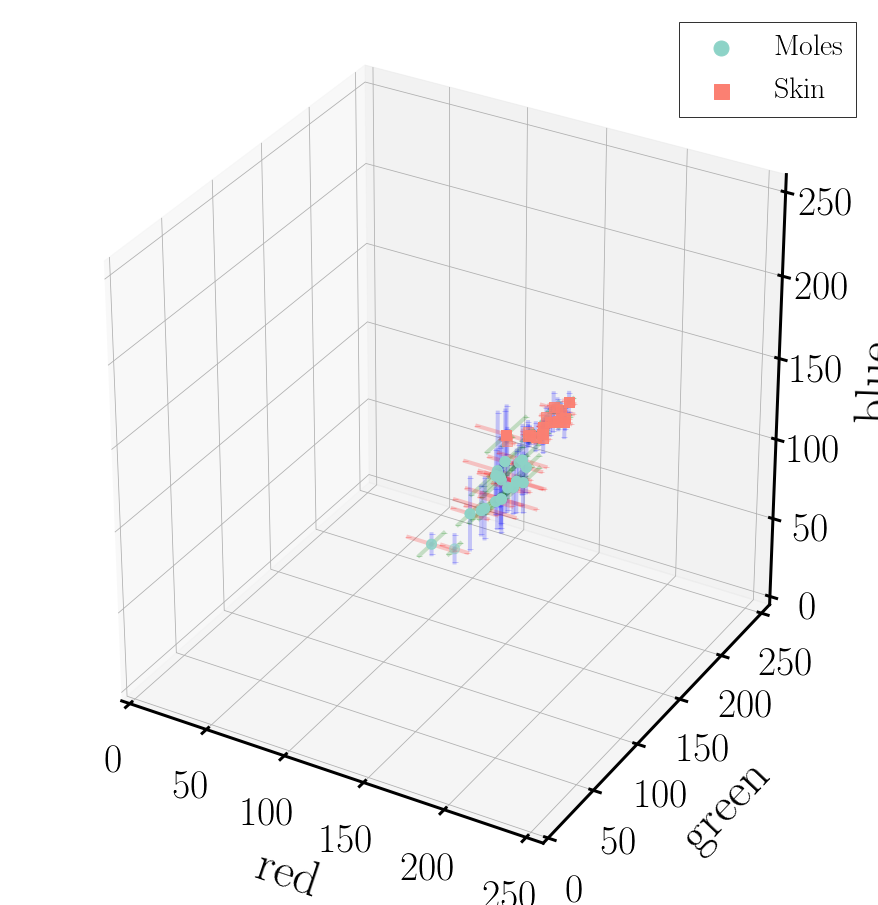

In [2]:
import mpl_toolkits.mplot3d.axes3d as axes3d


def PLOT_COLOURS(AX,DF,MARK,COL,LABEL):
    #data
    r = DF.red
    g = DF.green
    b = DF.blue

    #error data
    dr = DF.dred
    dg = DF.dgreen
    db = DF.dblue

    #plot errorbars
    for i in np.arange(0, len(r)):
        AX.plot([r[i]+dr[i], r[i]-dr[i]], [g[i], g[i]], [b[i], b[i]], marker="_",c="red",alpha=0.2,label="",zorder=-10*(i+1))
        AX.plot([r[i], r[i]], [g[i]+dg[i], g[i]-dg[i]], [b[i], b[i]], marker="_",c="green",alpha=0.2,label="",zorder=-10*(i+1))
        AX.plot([r[i], r[i]], [g[i], g[i]], [b[i]+db[i], b[i]-db[i]], marker="_",c="blue",alpha=0.2,label="",zorder=-10*(i+1))
    AX.scatter([r, r], [g, g], [b, b], marker=MARK,facecolor=COL,label=LABEL,s=100,zorder=10**6)

    #configure axes
    AX.set_xlim3d(0.,255.)
    AX.set_ylim3d(0.,255.)
    AX.set_zlim3d(0.,255.)
    AX.set_xlabel(r"${\rm red}$",labelpad=50)
    AX.set_ylabel(r"${\rm green}$",labelpad=50)
    AX.set_zlabel(r"${\rm blue}$",labelpad=50)
    AX.legend(loc="best")



molcol=pd.read_csv(os.getcwd()+"/MOLECOLS.csv")

skincol=pd.read_csv(os.getcwd()+"/SKINCOLS.csv")



fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


PLOT_COLOURS(ax,molcol,"o","C0",r"${\rm Moles}$")
PLOT_COLOURS(ax,skincol,"s","C3",r"${\rm Skin}$")


fig.savefig("/Users/pboorman/Desktop/MOLES/molecolours.pdf")

/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-1.0, right=-1.0
  'left=%s, right=%s') % (left, right))
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


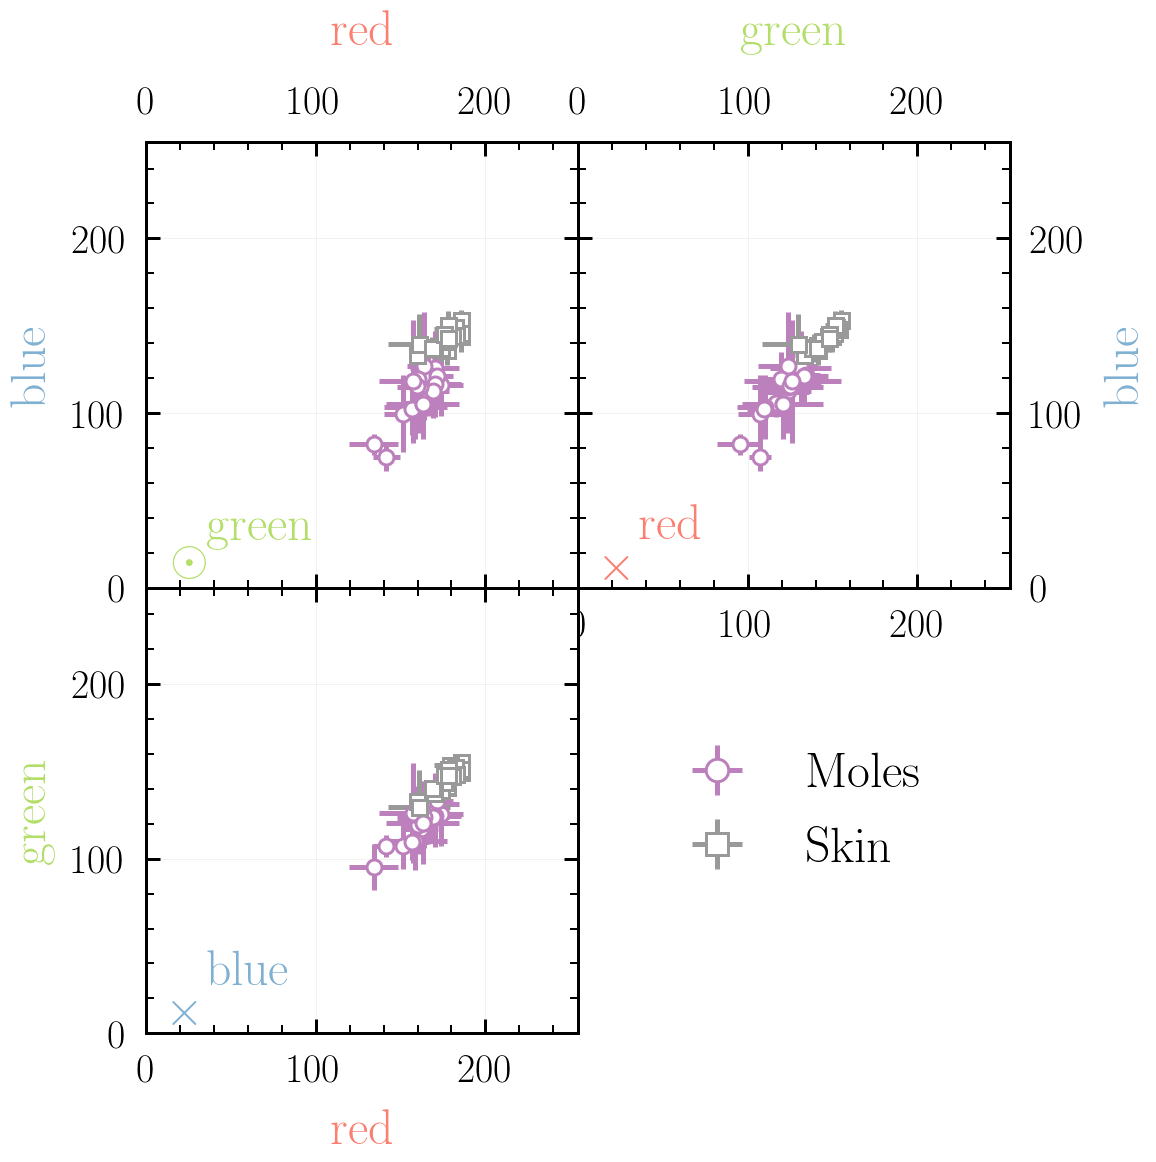

In [3]:
MOLE_COL="C9"
SKIN_COL="0.6"


import matplotlib as mpl
fig=plt.figure(figsize=(15,15))
gs1=mpl.gridspec.GridSpec(2,2,width_ratios=[1,1],height_ratios=[1,1])
fig.subplots_adjust(hspace=0.,wspace=0.)
axz=fig.add_subplot(gs1[0])
ayz=fig.add_subplot(gs1[1])
axy=fig.add_subplot(gs1[2])
a_null=fig.add_subplot(gs1[3])
a_null.axis("off")
a_null.set_xlim(-1.,-1.)
a_null.set_ylim(a_null.get_xlim())
a_null.errorbar([-2.,-2.],[-2.,-2.],xerr=[1.,1.],yerr=[1.,1.],fmt='o',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=MOLE_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm Moles}$",ecolor=MOLE_COL)#,xerr=rebin/2.E3)
a_null.errorbar([-2.,-2.],[-2.,-2.],xerr=[1.,1.],yerr=[1.,1.],fmt='s',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=SKIN_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm Skin}$",ecolor=SKIN_COL)#,xerr=rebin/2.E3)
LEG=a_null.legend(loc="center",frameon=False,fontsize=50.)



molcol=pd.read_csv(os.getcwd()+"/MOLECOLS.csv")
skincol=pd.read_csv(os.getcwd()+"/SKINCOLS.csv")

mole_r = molcol.red
mole_g = molcol.green
mole_b = molcol.blue
mole_dr = molcol.dred
mole_dg = molcol.dgreen
mole_db = molcol.dblue

skin_r = skincol.red
skin_g = skincol.green
skin_b = skincol.blue
skin_dr = skincol.dred
skin_dg = skincol.dgreen
skin_db = skincol.dblue

# from matplotlib.patches import Ellipse

# ells = [Ellipse(xy=[skin_r[i],skin_g[i]], width=skin_dr[i], height=skin_dg[i], angle=0.) for i in range(len(skin_r))]

# for e in ells:
#     axy.add_artist(e)
#     e.set_clip_box(ax.bbox)
#     e.set_facecolor("C3")

# ells = [Ellipse(xy=[mole_r[i],mole_g[i]], width=mole_dr[i], height=mole_dg[i], angle=0.) for i in range(len(mole_r))]

# for e in ells:
#     axy.add_artist(e)
#     e.set_clip_box(ax.bbox)
#     e.set_facecolor("brown")

    
    
axy.errorbar(mole_r,mole_g,xerr=mole_dr,yerr=mole_dg,fmt='o',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=MOLE_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm FPM}$",ecolor=MOLE_COL)#,xerr=rebin/2.E3)
axy.errorbar(skin_r,skin_g,xerr=skin_dr,yerr=skin_dg,fmt='s',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=SKIN_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm FPM}$",ecolor=SKIN_COL)#,xerr=rebin/2.E3)
axy.set_xlim(0.,255.);axy.set_ylim(0.,255.)
axy.set_xlabel(r"${\rm red}$",color="C3");axy.set_ylabel(r"${\rm green}$",color="C6")
axy.grid()

axz.errorbar(mole_r,mole_b,xerr=mole_dr,yerr=mole_db,fmt='o',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=MOLE_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm FPM}$",ecolor=MOLE_COL)#,xerr=rebin/2.E3)
axz.errorbar(skin_r,skin_b,xerr=skin_dr,yerr=skin_db,fmt='s',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=SKIN_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm FPM}$",ecolor=SKIN_COL)#,xerr=rebin/2.E3)
axz.set_xlim(0.,255.);axz.set_ylim(0.,255.)
axz.annotate(r"${\rm red}$",xy=(.5,1.25),xycoords='axes fraction',fontsize=50,zorder=500,color='C3',ha="center",va="center")
axz.set_ylabel(r"${\rm blue}$",color="C4")
axz.grid()
axz.tick_params(labelbottom='off',labeltop='on')

ayz.errorbar(mole_g,mole_b,xerr=mole_dg,yerr=mole_db,fmt='o',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=MOLE_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm FPM}$",ecolor=MOLE_COL)#,xerr=rebin/2.E3)
ayz.errorbar(skin_g,skin_b,xerr=skin_dg,yerr=skin_db,fmt='s',markersize=15,elinewidth=5.,capsize=0.,capthick=3.,
                    drawstyle='steps-mid',markeredgecolor=SKIN_COL,markerfacecolor='white',markeredgewidth=3.,zorder=11,label=r"${\rm FPM}$",ecolor=SKIN_COL)#,xerr=rebin/2.E3)
ayz.set_xlim(0.,255.);ayz.set_ylim(0.,255.)
ayz.set_ylabel(r"${\rm blue}$",color="C4")
ayz.grid()
ayz.tick_params(labelright='on',labeltop='on',labelleft='off')
ayz.yaxis.set_label_position("right")
ayz.annotate(r"${\rm green}$",xy=(.5,1.25),xycoords='axes fraction',fontsize=50,zorder=500,color='C6',ha="center",va="center")
 
axz.annotate(r"$\odot$",xy=(.06,.06),xycoords='axes fraction',fontsize=50,zorder=500,color='C6',ha="left",va="center")
axz.annotate(r"${\rm green}$",xy=(.14,.14),xycoords='axes fraction',fontsize=50,zorder=500,color='C6',ha="left",va="center")
ayz.annotate(r"$\times$",xy=(.06,.06),xycoords='axes fraction',fontsize=50,zorder=500,color='C3',ha="left",va="center")
ayz.annotate(r"${\rm red}$",xy=(.14,.14),xycoords='axes fraction',fontsize=50,zorder=500,color='C3',ha="left",va="center")
axy.annotate(r"$\times$",xy=(.06,.06),xycoords='axes fraction',fontsize=50,zorder=500,color='C4',ha="left",va="center")
axy.annotate(r"${\rm blue}$",xy=(.14,.14),xycoords='axes fraction',fontsize=50,zorder=500,color='C4',ha="left",va="center")

fig.savefig("/Users/pboorman/Desktop/MOLECOL.pdf")



/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


119.788005986 163.0
81.607834833 119.0
69.2171549498 110.0


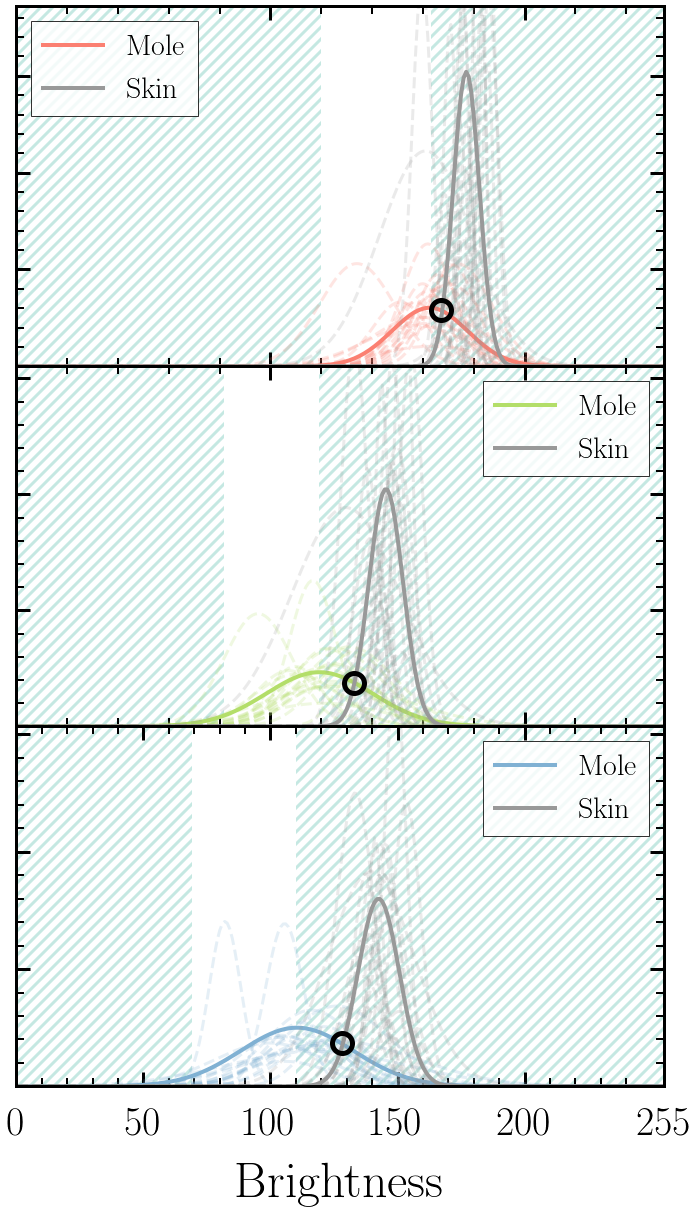

Process ForkPoolWorker-3:
Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/pboorman/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/pboorman/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/pboorman/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/pboorman/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/Users/pboorman/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/pboorman/anaconda/envs/py36/lib/python3.6/multiprocessing/process.py", line 93, in run
    se

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from regions import read_ds9,write_ds9,PixCoord,BoundingBox
from astropy.io import fits
from astropy.stats import SigmaClip

import palettable.colorbrewer as pc
from cycler import cycler
plt.rcParams["axes.prop_cycle"]=cycler('color',pc.qualitative.Set3_12.mpl_colors)
%matplotlib inline

from scipy.optimize import curve_fit
from astropy.stats import SigmaClip



import multiprocessing

def GAUSS(x,mu,sig,A):
    y = A*np.exp(-np.power((x - mu), 2.)/(2. * sig**2.))
    return np.array(y)

def GENRAN_COLS(DF):
    SIM_r,SIM_g,SIM_b=[np.random.normal(DF[COL],np.fabs(DF["d"+COL]),len(DF)) for COL in ["red","green","blue"]]
    return np.percentile(SIM_r,50),np.percentile(SIM_g,50),np.percentile(SIM_b,50)
 
def MC_COLOURS(DF,MC_RUNS):
    R,G,B=[np.array(pool.map(GENRAN_COLS,(DF for i in range(MC_RUNS))))[:,i] for i in range(3)]
    DF=pd.DataFrame(data={"red":R,"green":G,"blue":B})
    return DF
    
molcol=pd.read_csv(os.getcwd()+"/MOLECOLS.csv")
skincol=pd.read_csv(os.getcwd()+"/SKINCOLS.csv")

pool=multiprocessing.Pool(os.cpu_count())

MC_RUNS=10**3
MCMOLE=MC_COLOURS(molcol,MC_RUNS)
MCSKIN=MC_COLOURS(skincol,MC_RUNS)


fig=plt.figure(figsize=(9,15))

gs=gridspec.GridSpec(3,1)
gs.update(left=0.,right=1.,bottom=0.,top=1.,wspace=0.,hspace=0.)
ax_r=fig.add_subplot(gs[0,0])
ax_g=fig.add_subplot(gs[1,0])
ax_b=fig.add_subplot(gs[2,0])

def PLOT_DISTS(GS,DF,MCDF,COLS,LABEL):
    X=np.arange(0.,256.,1.)
    AVERAGE=pd.DataFrame(columns=["red","green","blue"])
    for i,COLOUR in enumerate(["red","green","blue"]):
        AX=plt.subplot(GS[i,0])
        AVERAGE.loc[:,COLOUR]=GAUSS(X,np.percentile(MCDF[COLOUR],50),np.sqrt(len(DF))*np.std(MCDF[COLOUR]),np.mean(DF["AMP_"+COLOUR]))
        AX.plot(X,AVERAGE[COLOUR],COLS[i],ls="-",lw=4.,label=LABEL)
        for j,src in DF.iterrows():
            temp_G=GAUSS(X,src[COLOUR],src["d"+COLOUR],src["AMP_"+COLOUR])
            AX.plot(X,temp_G,COLS[i],ls="--",lw=3.,alpha=0.2,label="")
            if (j==0):
                AX.set_ylim(0.,np.max(DF[COLOUR]))
                LEG=AX.legend(loc="best",ncol=1)
    return AVERAGE


AVERAGE_MOL=PLOT_DISTS(gs,molcol,MCMOLE,["C3","C6","C4"],r"${\rm Mole}$")
AVERAGE_SKIN=PLOT_DISTS(gs,skincol,MCSKIN,["0.6","0.6","0.6"],r"${\rm Skin}$")

    
X=np.arange(0.,256.,1.)
for c,col in enumerate(["red","green","blue"]):
    AX=plt.subplot(gs[c,0])
    
    try:
        INTERSECT=np.argwhere(np.diff(np.sign(AVERAGE_MOL[col].values-AVERAGE_SKIN[col].values))).flatten()[0]
        AX.plot(X[INTERSECT],AVERAGE_MOL.iloc[INTERSECT][col],mfc="none",mec="k",mew=5.,marker="o",ms=20.,zorder=10**7)
        ## print potential regions of exclusion
        LOWER=X[np.argmax(AVERAGE_MOL[col])]-5.*np.std(AVERAGE_MOL[col])
        AX.axvspan(0.,LOWER,facecolor="none",edgecolor="C0",hatch="//",lw=0.,zorder=-1,alpha=0.5)
        LIM1=X[np.argmax(AVERAGE_SKIN[col])]-2.*np.std(AVERAGE_SKIN[col])
        LIM2=X[INTERSECT]
        UPPER=0.5*(LIM1+LIM2)
        UPPER=X[np.argmax(AVERAGE_MOL[col])]
        AX.axvspan(UPPER,256.,facecolor="none",edgecolor="C0",hatch="//",lw=0.,zorder=-1,alpha=0.5)
        print(LOWER,UPPER)
    except:
        print("No intersect?")
        
    



ax_r.set_xlim(0.,255.)
ax_g.set_xlim(0.,255.)
ax_b.set_xlim(0.,255.)
ax_r.set_yticklabels([])
ax_g.set_yticklabels([])
ax_b.set_yticklabels([])
ax_r.set_xticklabels([])
ax_g.set_xticklabels([])
ax_b.set_xticks([0.,50.,100.,150.,200.,255.])

ax_b.set_xlabel(r"${\rm Brightness}$")

fig.savefig("/Users/pboorman/Desktop/MOLES/AVERAGE_COLOUR.pdf")

/Users/pboorman/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


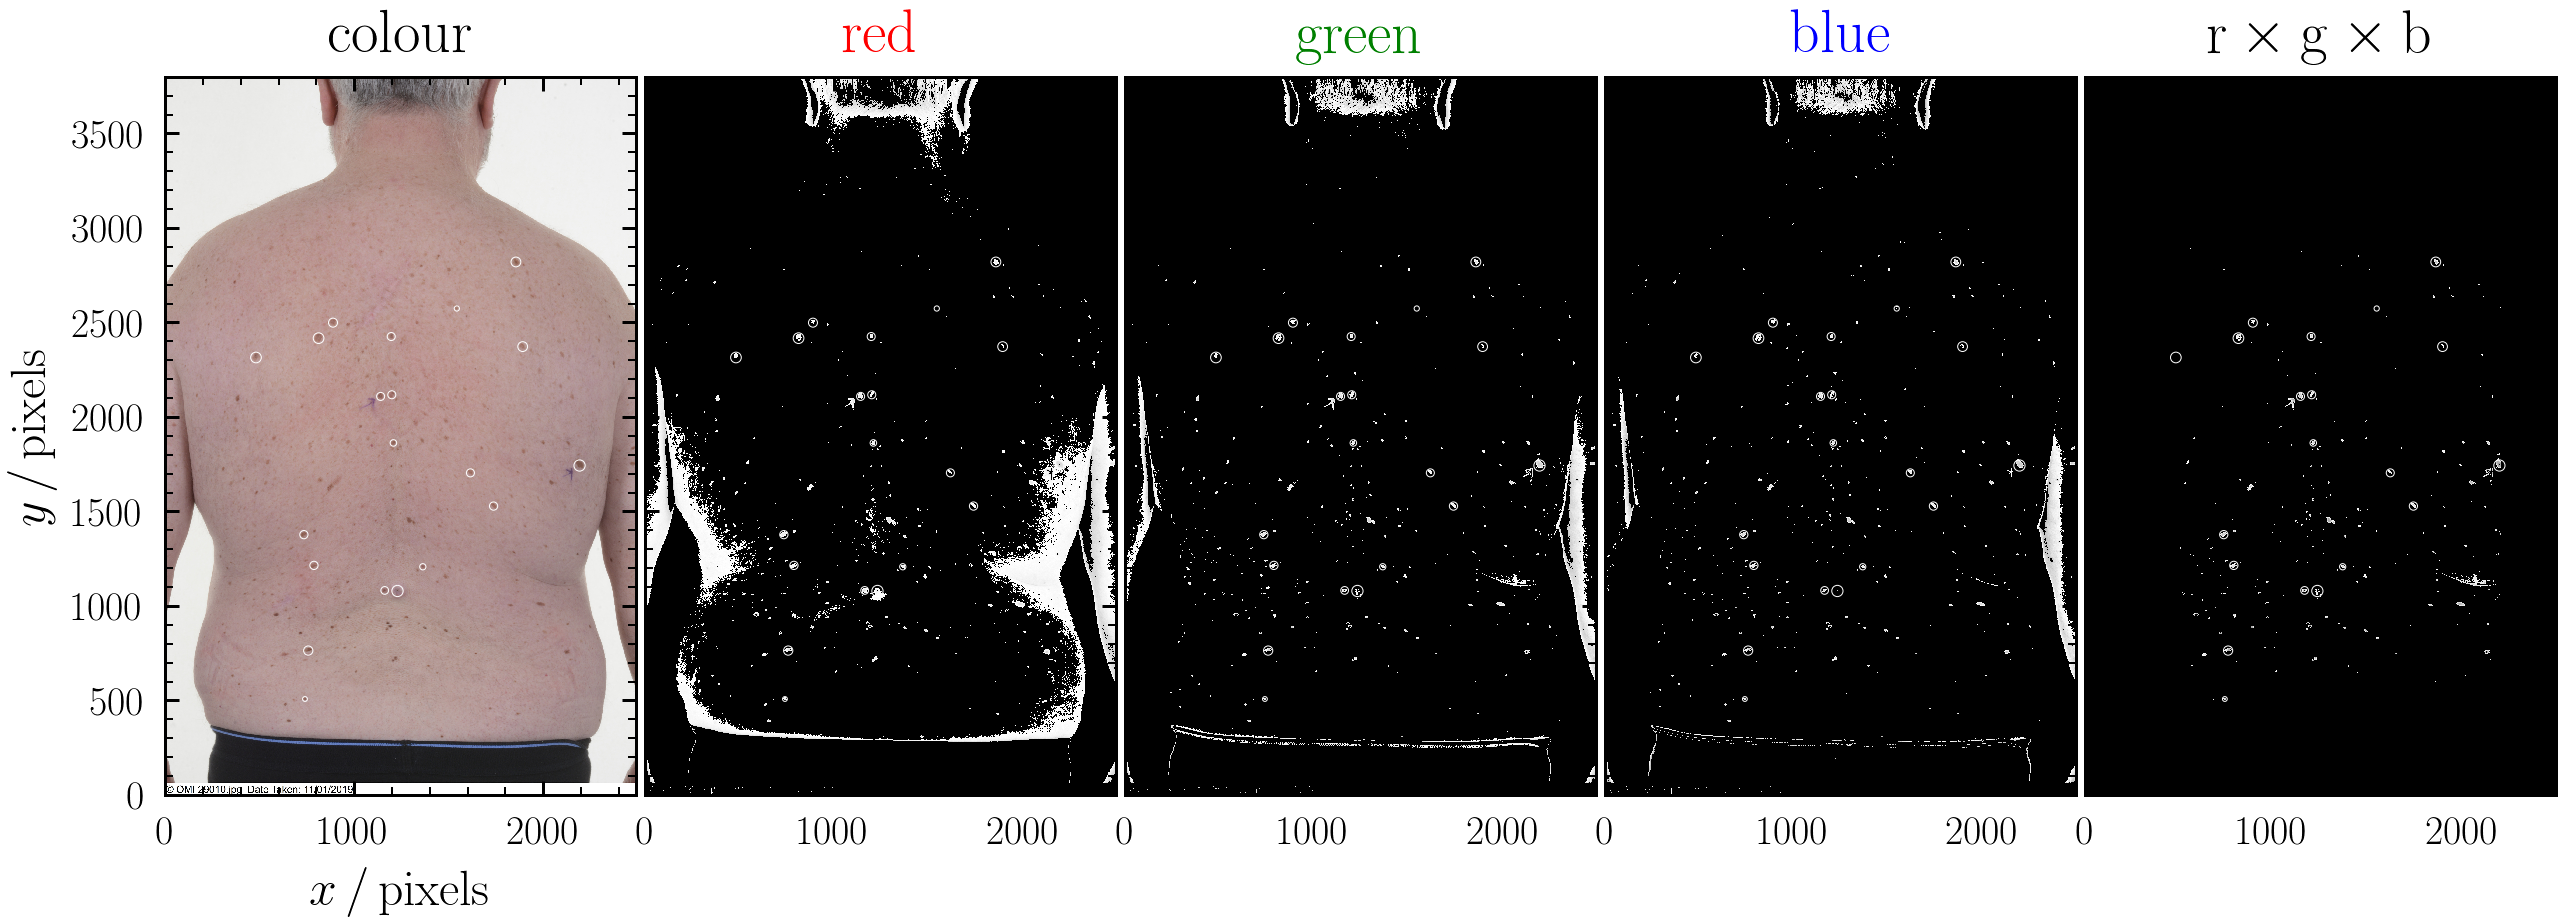

In [2]:
from regions import read_ds9, write_ds9
from astropy.io import fits
import matplotlib.image as mpimg
filename = './regions/multi_size_circ.reg'
regs = read_ds9(filename)

from regions import PixCoord, BoundingBox
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(8.3*4.,12.667))

gs=gridspec.GridSpec(1,5)
gs.update(left=0.,right=1.,bottom=0.,top=1.,wspace=0.02,hspace=0.)
ax_r=fig.add_subplot(gs[0,1])
ax_g=fig.add_subplot(gs[0,2])
ax_b=fig.add_subplot(gs[0,3])
ax_rgb=fig.add_subplot(gs[0,0])
ax_mult=fig.add_subplot(gs[0,4])



image = mpimg.imread("29010.jpg")[::-1]
im=ax_rgb.imshow(image)

for i,reg in enumerate(regs):
    reg.plot(ax=ax_rgb)
# ax_rgb.set_ylim(ax.get_ylim()[::-1])
ax_rgb.set_ylabel(r"$y\,/\,{\rm pixels}$")
ax_rgb.set_xlabel(r"$x\,/\,{\rm pixels}$")
ax_rgb.set_title(r"${\rm colour}$",y=1.02,fontsize=60.)
ax_rgb.set_ylim(ax_rgb.get_ylim()[::-1])

X=np.arange(0.,256.,1.)

## derived in previous cell
LOWERLIMS=[117.788905949,82.4241582867,70.0076388675]
UPPERLIMS=[162.,120.,111.]
for c,col in enumerate(["red","green","blue"]):
    data = fits.open(col+".fits")[0].data
    data[data>UPPERLIMS[c]]=0.
    data[data<LOWERLIMS[c]]=0.
    AX=plt.subplot(gs[0,c+1])
    im=AX.imshow(-data,cmap="Greys")
    for i,reg in enumerate(regs):
        reg.plot(ax=AX)
    AX.set_ylim(AX.get_ylim()[::-1])
    AX.set_yticklabels([])
    AX.set_title(r"${\rm %(col)s}$" %locals(),y=1.02,color=col,fontsize=60.)

    

red = fits.open("red.fits")[0].data
red[(red>UPPERLIMS[0])|(red<LOWERLIMS[0])]=0.

green = fits.open("green.fits")[0].data
green[(green>UPPERLIMS[1])|(green<LOWERLIMS[1])]=0.

blue = fits.open("blue.fits")[0].data
blue[(blue>UPPERLIMS[2])|(blue<LOWERLIMS[2])]=0.

mult=np.multiply(red,green,blue,dtype=int)

mask=np.zeros_like(mult,dtype=int)
## nrows,ncols
mask[500:3200,500:2200]=1
mult=np.multiply(mult,mask)

im=ax_mult.imshow(-mult,cmap="Greys")
for i,reg in enumerate(regs):
    reg.plot(ax=ax_mult)
ax_mult.set_title(r"${\rm r}\times{\rm g}\times{\rm b}$" %locals(),y=1.02,color="k",fontsize=60.)
ax_mult.set_ylim(ax_mult.get_ylim()[::-1])
ax_mult.set_yticklabels([])

fig.savefig("/Users/pboorman/Desktop/MOLES/subtract.pdf")

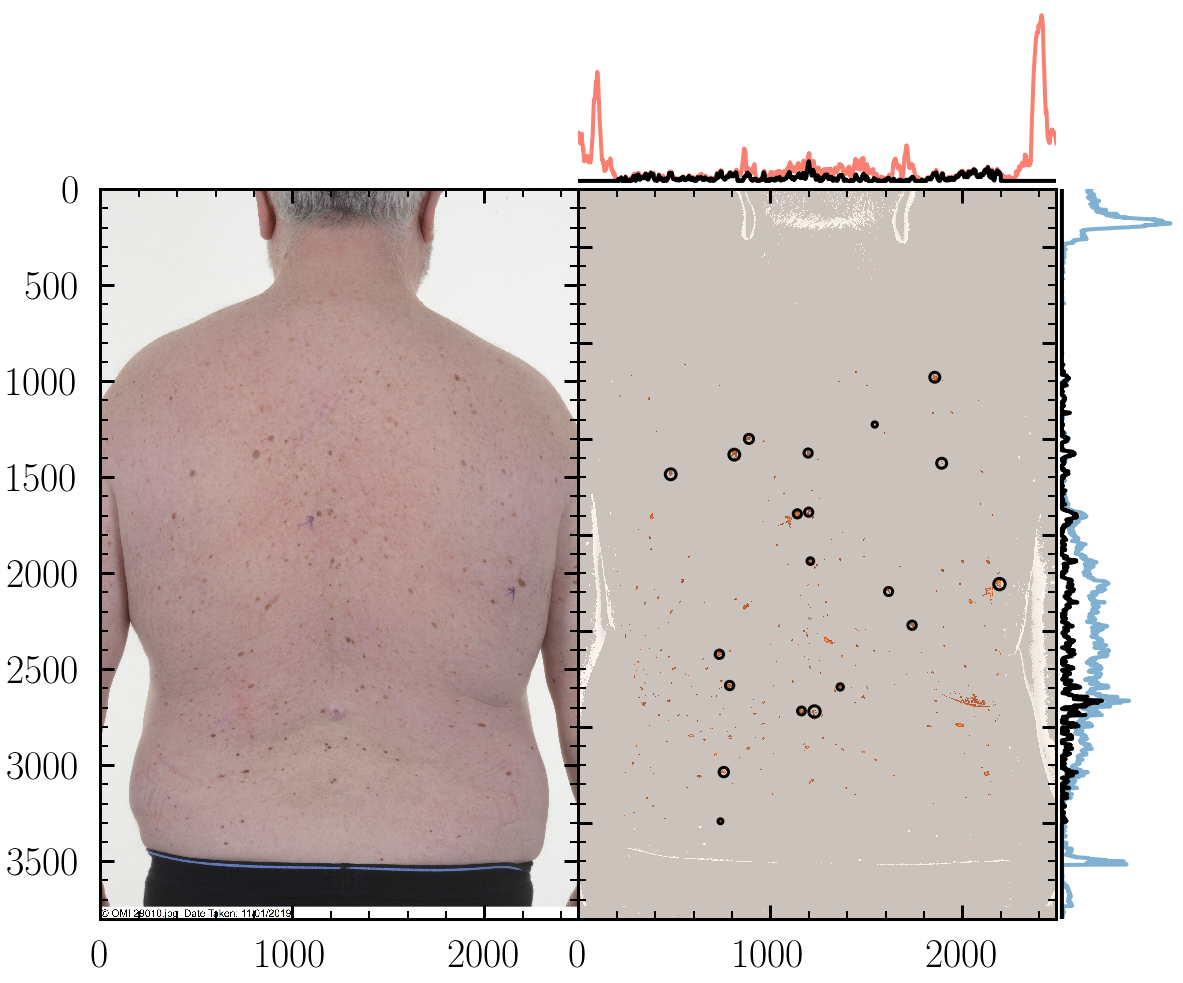

In [48]:
fig=plt.figure(figsize=(8.3,12.667))

gs_main=gridspec.GridSpec(1,1)
gs_main.update(left=0.,right=0.8,bottom=0.,top=0.8,wspace=0.,hspace=0.)
ax=fig.add_subplot(gs_main[0,0])

gs_rgb=gridspec.GridSpec(1,1)
gs_rgb.update(left=-0.8,right=0.,bottom=0.,top=0.8,wspace=0.,hspace=0.)
ax_rgb=fig.add_subplot(gs_rgb[0,0])


gs_up=gridspec.GridSpec(1,1)
gs_up.update(left=0.,right=0.8,bottom=0.8,top=1.,wspace=0.,hspace=0.)
ax_up=fig.add_subplot(gs_up[0,0])
ax_up.axis("off")


gs_side=gridspec.GridSpec(1,1)
gs_side.update(left=0.8,right=1.,bottom=0.,top=0.8,wspace=0.3,hspace=0.3)
ax_side=fig.add_subplot(gs_side[0,0])
ax_side.axis("off")



red = fits.open("red.fits")[0].data
red[(red>UPPERLIMS[0])|(red<LOWERLIMS[0])]=0.

green = fits.open("green.fits")[0].data
green[(green>UPPERLIMS[1])|(green<LOWERLIMS[1])]=0.

blue = fits.open("blue.fits")[0].data
blue[(blue>UPPERLIMS[2])|(blue<LOWERLIMS[2])]=0.

mult=np.multiply(red,green,blue,dtype=int)

mask=np.ones_like(mult,dtype=int)
## nrows,ncols
# mask[500:3200,500:2200]=1
mult=np.multiply(mult,mask)

im=ax.imshow(-mult,cmap="Greys")
# ax_up.set_title(r"${\rm r}\times{\rm g}\times{\rm b}$" %locals(),y=1.02,color="k",fontsize=60.)
ax.set_ylim(ax_mult.get_ylim())#[::-1])
# ax.set_yticklabels([])




## up distribution
yvals=np.mean(mult,axis=0)
xvals=np.array(range(mult.shape[1]))
ax_up.plot(xvals,yvals,color="C3")

# sigclip=SigmaClip(sigma_upper=2,maxiters=None,cenfunc=np.median,sigma_lower=3)
# filtered_data=sigclip(yvals)
# cl_x=xvals[(~filtered_data.mask)]
# cl_y=yvals[(~filtered_data.mask)]

# ax.plot(cl_x,cl_y,color="k",zorder=10**3)
# mult[cl_x,cl_y]=0.
ax_up.set_yticklabels([])
ax_up.set_xlim(ax.get_xlim())


## side distribution
xvals=np.mean(mult,axis=1)
yvals=np.array(range(mult.shape[0]))
ax_side.plot(xvals,yvals,color="C4")
ax_side.set_xticklabels([])
ax_side.set_ylim(ax.get_ylim())

# mult_mask=np.ones_like(mult,dtype=int)
# print(mult.shape)
# mult_mask[0:500,0:200]=0
# # mult_mask[0:500|3200:-1,0:200|2200:]=0

# print(mult_mask)
# mult=np.ma.masked_array(mult,mult_mask)
# print(mult.shape)
# yvals=np.mean(mult,axis=0)
# xvals=np.array(range(mult.shape[1]))
# # ax.plot(xvals,yvals,color="k")

# xvals=np.mean(mult,axis=1)
# yvals=np.array(range(mult.shape[0]))
# ax.plot(xvals,yvals,color="k")

# ax.set_xlim(0.,2490.)
# # ax.set_ylim(0.,3800.)





mask=np.zeros_like(mult,dtype=int)
## nrows,ncols
mask[500:3200,200:2200]=1

mult=np.multiply(mult,mask)
xvals=np.mean(mult,axis=1)
yvals=np.array(range(mult.shape[0]))
ax_side.plot(xvals,yvals,color="k")


yvals=np.mean(mult,axis=0)
xvals=np.array(range(mult.shape[1]))
ax_up.plot(xvals,yvals,color="k")





im_cor=ax.imshow(-mult,cmap="Oranges_r",alpha=0.8)
for i,reg in enumerate(regs):
    reg.plot(ax=ax,edgecolor="k",linewidth=3)
ax.set_yticklabels([])
    
    
    
    
    




image=mpimg.imread("29010.jpg")
im=ax_rgb.imshow(image)


fig.savefig("/Users/pboorman/Desktop/MOLES/SIGMA_CLIP.pdf")

# Looking for colour correlations
## First create a dataframe

In [4]:
red = fits.open("red.fits")[0].data
green = fits.open("green.fits")[0].data
blue = fits.open("blue.fits")[0].data

# red[(red>UPPERLIMS[0])|(red<LOWERLIMS[0])]=0.
print(red.shape)

pixel_df=pd.DataFrame(data={"red_raw":red.flatten("C"),
                            "green_raw":green.flatten("C"),
                            "blue_raw":blue.flatten("C")})

## this enables creation of image from dataframe
# image=pixel_df.red_raw.reshape(red.shape)

## mult is the mask created in the above cell using red, green and blue
## and additionally stripping out the edges
mult[mult!=0]=255

pixel_df.loc[:,"COMBINED_MOLE_MASK"]=mult.flatten("C")
pixel_df.loc[:,"RG"]=pixel_df.red_raw/pixel_df.green_raw
pixel_df.loc[:,"RB"]=pixel_df.red_raw/pixel_df.blue_raw
pixel_df.loc[:,"GB"]=pixel_df.green_raw/pixel_df.blue_raw

pixel_df.loc[:,"MASK_COLOUR"]="C0"
pixel_df.loc[(pixel_df.COMBINED_MOLE_MASK>0),"MASK_COLOUR"]="C3"
print(len(pixel_df.loc[pixel_df.MASK_COLOUR=="C3"]))

(3800, 2490)
35912


## Plot scatter of different colours

ALL RG v RB CONTOUR DONE
MOLE RG v RB CONTOUR DONE
ALL RG v GB CONTOUR DONE
MOLE RG v GB CONTOUR DONE
ALL RB v GB CONTOUR DONE
MOLE RB v GB CONTOUR DONE


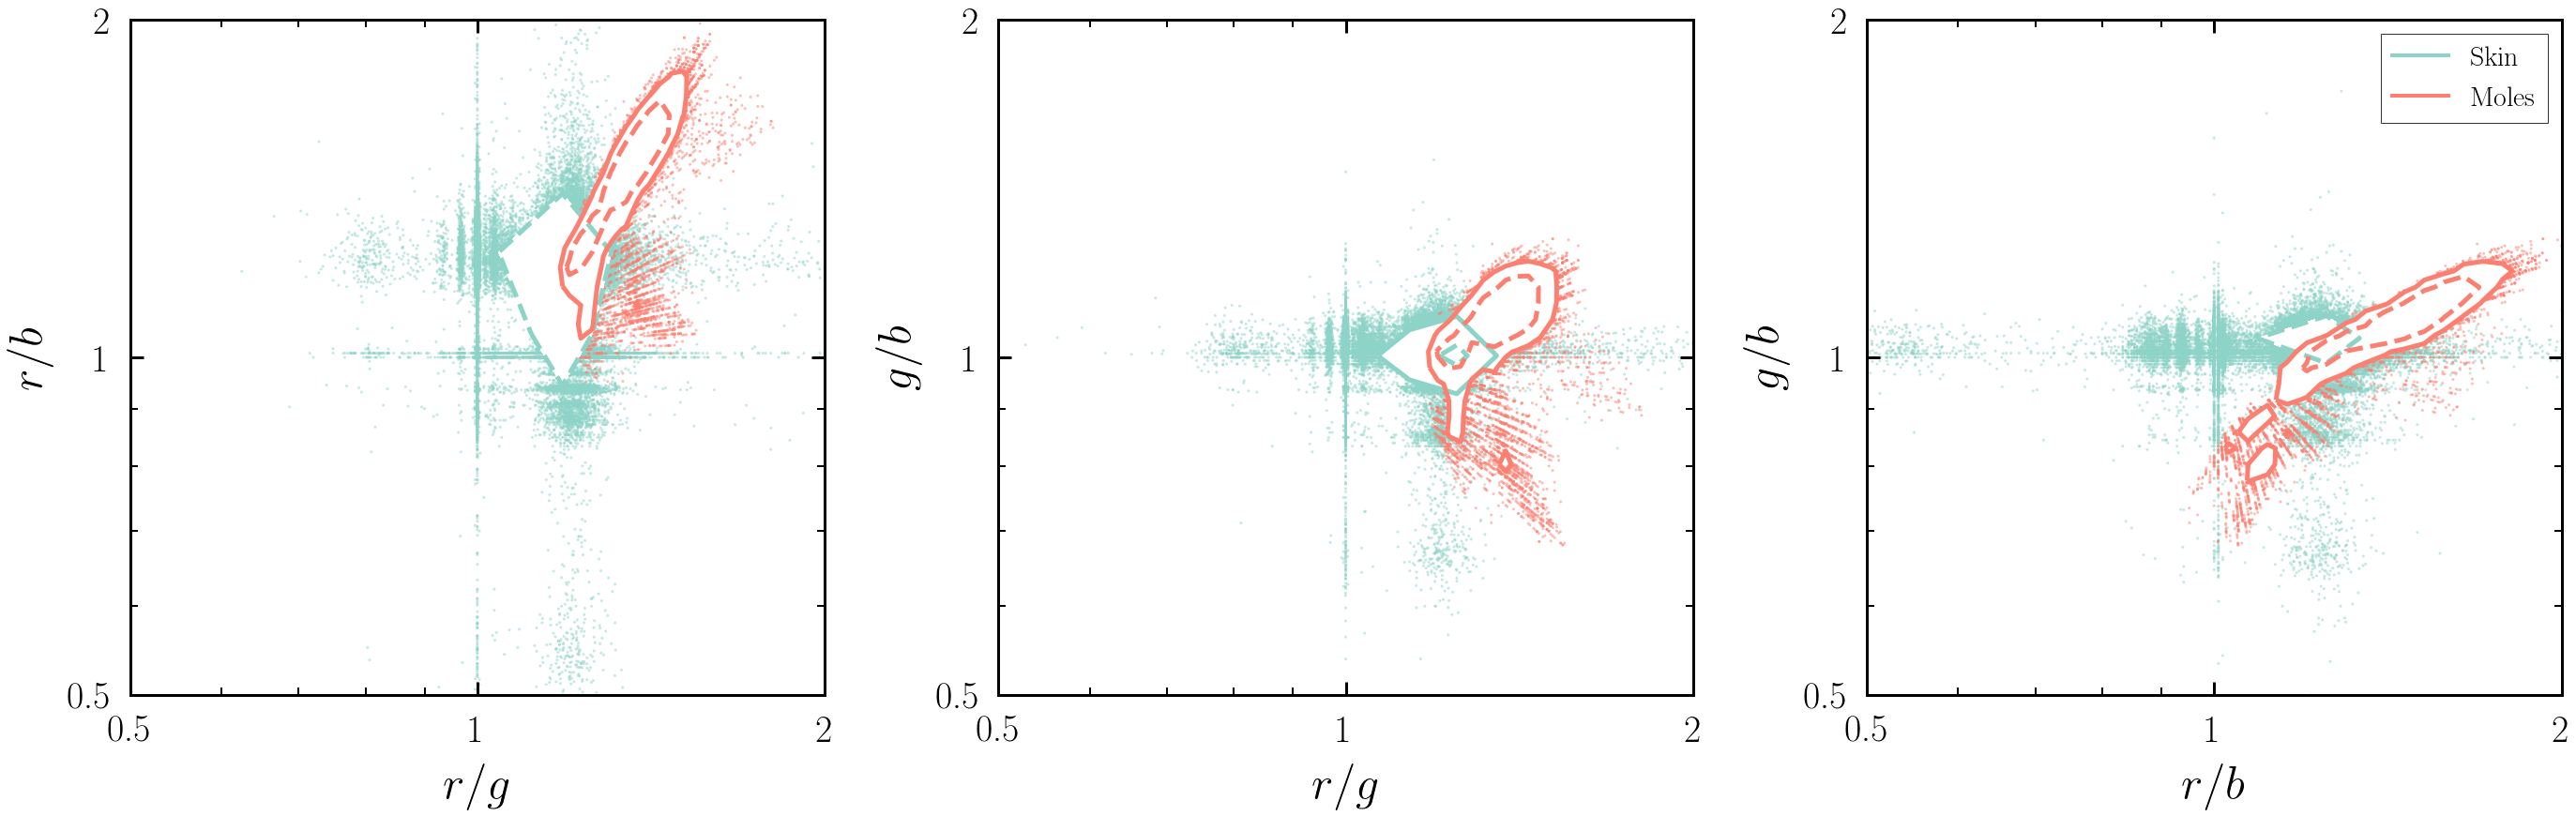

In [42]:
import scipy.stats as ss
from matplotlib.ticker import NullFormatter


## Very important function
def CONVERT_TO_STDEV(ZVALS):
    # From astroML
    ZSHAPE=ZVALS.shape
    ZVALS=ZVALS.ravel()
    i_sort=np.argsort(ZVALS)[::-1]
    i_unsort=np.argsort(i_sort)

    ZCUMSUM=1.0*ZVALS[i_sort].cumsum()
    ZCUMSUM/=ZCUMSUM[-1]
    return ZCUMSUM[i_unsort].reshape(ZSHAPE)


## Code to plot an arbitrary contour of x vs. y
def PLOT_2DCONTOUR(x,y,AX_CONT,COL):#SRC,x,XVALS,y,YVALS,AX_CONT,AX_UP,AX_SIDE,COL="0.3",LS=["-","--"],SIDE="right",confidence_leg=True,ANNOTATION_SIDE="left"):
    AX_CONT.set_xscale("log")    
    AX_CONT.set_yscale("log")
#     ax_CONT.set_xlim(1.e-2,2.)
#     ax_CONT.set_ylim(1.e-2,2.)
    ## different ways to define the contour levels
    ## SIGMAS=np.array([0, 1, 2, 3])
    ## SIGMA_FRAC=2*ss.norm.cdf(SIGMAS)-1.0
    SIGMA_FRAC=np.array([0.,0.68268949,0.9])
#     SIGMA_FRAC=np.array([0.,0.5,0.68268949])
    
    ## Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    nbins=20
    k = ss.kde.gaussian_kde([x,y])
    xmin=x.min();xmax=x.max()
    ymin=y.min();ymax=y.max()
#     if xscale=="log":
    xmin=np.log10(xmin)
    xmax=np.log10(xmax)
#     if yscale=="log":
    ymin=np.log10(ymin)
    ymax=np.log10(ymax)
        
    ## using a complex number just ensures that the bins are distributed into float values
    xi,yi=np.mgrid[xmin:xmax:nbins*1j,ymin:ymax:nbins*1j]
    xi=10**xi
    yi=10**yi
    zi=k(np.vstack([xi.flatten(),yi.flatten()]))
    zi=CONVERT_TO_STDEV(zi.T)
    
    CONT=AX_CONT.contourf(xi,yi,zi.reshape(xi.shape),levels=SIGMA_FRAC,colors=('white', 'white', 'white'),zorder=10) 
    CONT2=AX_CONT.contour(xi,yi,zi.reshape(xi.shape),levels=SIGMA_FRAC,colors=(COL,COL,'k'),linewidths=5.,linestyles=("--","-"),zorder=10**2) 
    AX_CONT.scatter(x,y,facecolor=COL,marker=".",alpha=0.5,linewidth=0.,edgecolor="none",label="",zorder=1)
    


## these functions just set up the unique parameters/parts of specific contours, before using the arbitrary contour function above   
def CONTOURS(DF,ax_RGRB,ax_RGGB,ax_RBGB):
    COL="C0"
    X=DF.loc[(DF.MASK_COLOUR=="C0")&(DF.RG<=2.)&(DF.RG>=1.E-2)&(DF.GB<=2.)&(DF.GB>=1.E-2)].dropna(subset=["RG","RB"]).RG.sample(10**5).values
    Y=DF.loc[(DF.MASK_COLOUR=="C0")&(DF.RG<=2.)&(DF.RG>=1.E-2)&(DF.GB<=2.)&(DF.GB>=1.E-2)].dropna(subset=["RG","RB"]).RB.sample(10**5).values
    PLOT_2DCONTOUR(X,Y,ax_RGRB,COL)
    print("ALL RG v RB CONTOUR DONE")
    
    COL="C3"
    X=DF.loc[(DF.MASK_COLOUR=="C3")].dropna(subset=["RG","RB"]).RG.values
    Y=DF.loc[(DF.MASK_COLOUR=="C3")].dropna(subset=["RG","RB"]).RB.values
    PLOT_2DCONTOUR(X,Y,ax_RGRB,COL)
    print("MOLE RG v RB CONTOUR DONE")

    ax_RGRB.set_xlabel(r"$r/g$")
    ax_RGRB.set_ylabel(r"$r/b$")
    ax_RGRB.set_xlim([0.5,2.])
    ax_RGRB.set_ylim([0.5,2.])
    ax_RGRB.set_xticks([0.5,1.,2.])
    ax_RGRB.set_yticks([0.5,1.,2.])
    ax_RGRB.xaxis.set_major_formatter(NullFormatter())
    ax_RGRB.yaxis.set_major_formatter(NullFormatter())
    ax_RGRB.xaxis.set_minor_formatter(NullFormatter())
    ax_RGRB.yaxis.set_minor_formatter(NullFormatter())
    ax_RGRB.set_xticklabels(["0.5","1","2"])
    ax_RGRB.set_yticklabels(["0.5","1","2"])
    
    COL="C0"
    X=DF.loc[(DF.MASK_COLOUR=="C0")&(DF.RG<=2.)&(DF.RG>=1.E-2)&(DF.GB<=2.)&(DF.GB>=1.E-2)].dropna(subset=["RG","GB"]).RG.sample(10**5).values
    Y=DF.loc[(DF.MASK_COLOUR=="C0")&(DF.RG<=2.)&(DF.RG>=1.E-2)&(DF.GB<=2.)&(DF.GB>=1.E-2)].dropna(subset=["RG","GB"]).GB.sample(10**5).values
    PLOT_2DCONTOUR(X,Y,ax_RGGB,COL)
    print("ALL RG v GB CONTOUR DONE")
    
    COL="C3"
    X=DF.loc[(DF.MASK_COLOUR=="C3")].dropna(subset=["RG","GB"]).RG.values
    Y=DF.loc[(DF.MASK_COLOUR=="C3")].dropna(subset=["RG","GB"]).GB.values
    PLOT_2DCONTOUR(X,Y,ax_RGGB,COL)
    print("MOLE RG v GB CONTOUR DONE")

    ax_RGGB.set_xlabel(r"$r/g$")
    ax_RGGB.set_ylabel(r"$g/b$")
    ax_RGGB.set_xlim([0.5,2.])
    ax_RGGB.set_ylim([0.5,2.])
    ax_RGGB.set_xticks([0.5,1.,2.])
    ax_RGGB.set_yticks([0.5,1.,2.])
    ax_RGGB.xaxis.set_major_formatter(NullFormatter())
    ax_RGGB.yaxis.set_major_formatter(NullFormatter())
    ax_RGGB.xaxis.set_minor_formatter(NullFormatter())
    ax_RGGB.yaxis.set_minor_formatter(NullFormatter())
    ax_RGGB.set_xticklabels(["0.5","1","2"])
    ax_RGGB.set_yticklabels(["0.5","1","2"])
    

    COL="C0"
    X=DF.loc[(DF.MASK_COLOUR=="C0")&(DF.RG<=2.)&(DF.RG>=1.E-2)&(DF.GB<=2.)&(DF.GB>=1.E-2)].dropna(subset=["RB","GB"]).RB.sample(10**5).values
    Y=DF.loc[(DF.MASK_COLOUR=="C0")&(DF.RG<=2.)&(DF.RG>=1.E-2)&(DF.GB<=2.)&(DF.GB>=1.E-2)].dropna(subset=["RB","GB"]).GB.sample(10**5).values
    PLOT_2DCONTOUR(X,Y,ax_RBGB,COL)
    print("ALL RB v GB CONTOUR DONE")
    
    COL="C3"
    X=DF.loc[(DF.MASK_COLOUR=="C3")].dropna(subset=["RB","GB"]).RB.values
    Y=DF.loc[(DF.MASK_COLOUR=="C3")].dropna(subset=["RB","GB"]).GB.values
    PLOT_2DCONTOUR(X,Y,ax_RBGB,COL)
    print("MOLE RB v GB CONTOUR DONE")
    
    ax_RBGB.set_xlabel(r"$r/b$")
    ax_RBGB.set_ylabel(r"$g/b$")
    ax_RBGB.set_xlim([0.5,2.])
    ax_RBGB.set_ylim([0.5,2.])
    ax_RBGB.set_xticks([0.5,1.,2.])
    ax_RBGB.set_yticks([0.5,1.,2.])
    ax_RBGB.xaxis.set_major_formatter(NullFormatter())
    ax_RBGB.yaxis.set_major_formatter(NullFormatter())
    ax_RBGB.xaxis.set_minor_formatter(NullFormatter())
    ax_RBGB.yaxis.set_minor_formatter(NullFormatter())
    ax_RBGB.set_xticklabels(["0.5","1","2"])
    ax_RBGB.set_yticklabels(["0.5","1","2"])
    
    ax_RBGB.plot([10.,10.],[10.,10.],c="C0",label=r"${\rm Skin}$")
    ax_RBGB.plot([10.,10.],[10.,10.],c="C3",label=r"${\rm Moles}$")
    ax_RBGB.legend(loc="best")






fig=plt.figure(figsize=(36,10))
gs=gridspec.GridSpec(1,3)
gs.update(left=0.,right=1.,bottom=0.,top=1.,wspace=0.25,hspace=0.)
ax_RGRB=fig.add_subplot(gs[0,0])
ax_RGGB=fig.add_subplot(gs[0,1])
ax_RBGB=fig.add_subplot(gs[0,2])

CONTOURS(pixel_df,ax_RGRB,ax_RGGB,ax_RBGB)

fig.savefig("/Users/pboorman/Desktop/MOLES/COLOUR_CLUSTERING.png")
plt.show()

## $\texttt{skimage}$ blob detect  
https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html#sphx-glr-auto-examples-features-detection-plot-blob-py

In [ ]:
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image_gray = blue_subtract# fits.open("blue.fits")[0].data#data.hubble_deep_field()[0:500, 0:500]
# image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=30, threshold=.5)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * np.sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian',
          'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

In [ ]:
print(blobs_log)

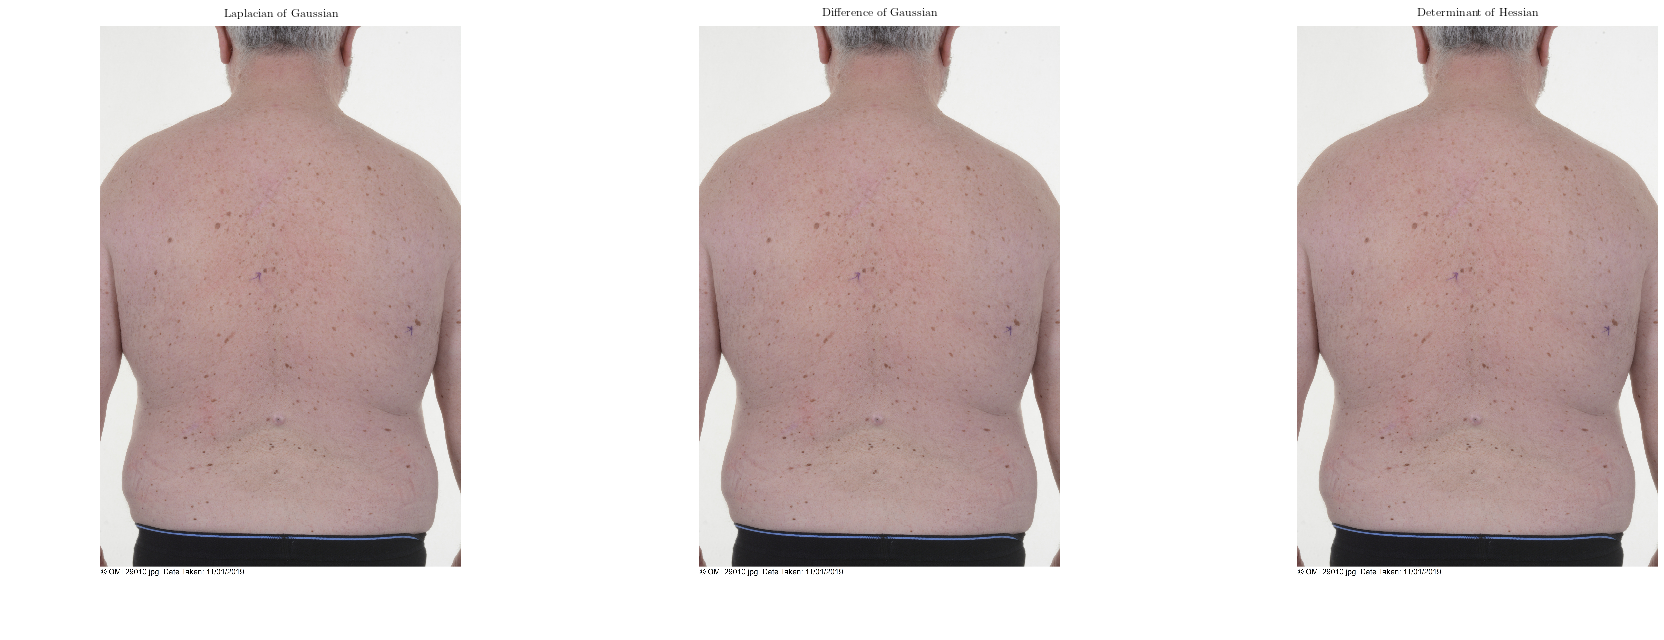

In [181]:
fig, axes = plt.subplots(1, 3, figsize=(27, 9), sharex=True, sharey=True)
ax = axes.ravel()
image = mpimg.imread("29010.jpg")

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()